for the images : https://drive.google.com/drive/folders/1UqlmWZgJNyqNEq15knupEM3-wdgbHRBr

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline


#3A: Display the original images

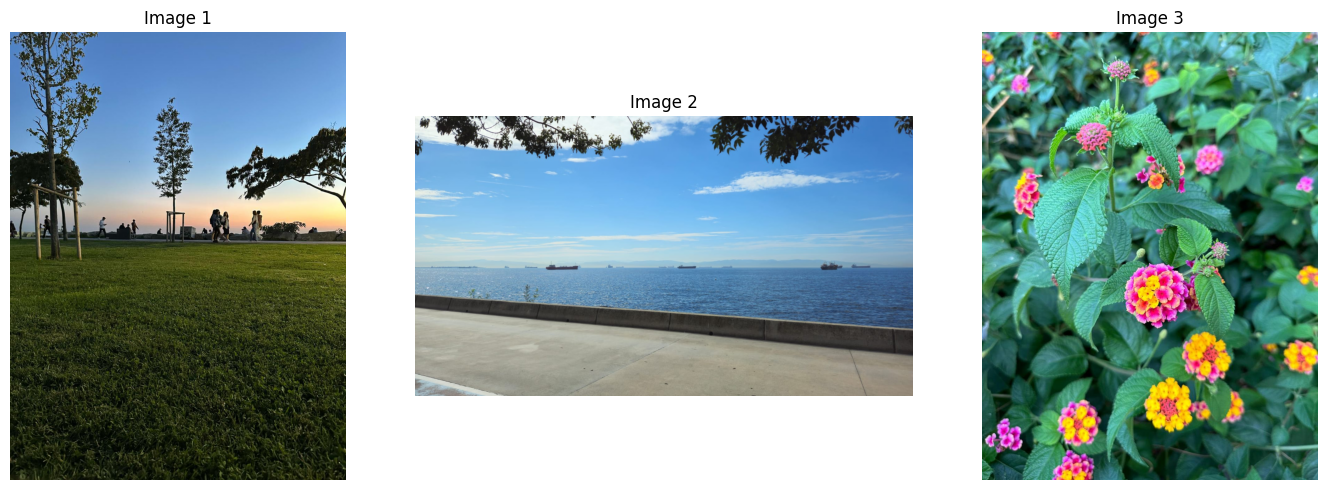

In [3]:

img1 = plt.imread("Group7_image1a.jpg")
img2 = plt.imread("Group7_image1b.jpg")
img3 = plt.imread("Group7_image1c.jpg")

# Create a subplot with 1 row and 3 columns to display all three images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Place each image in its respective subplot with titles
axs[0].imshow(img1)
axs[0].set_title("Image 1")
axs[0].axis("off")  # Hide axes for cleaner visualization
axs[1].imshow(img2)
axs[1].set_title("Image 2")
axs[1].axis("off")
axs[2].imshow(img3)
axs[2].set_title("Image 3")
axs[2].axis("off")

# Display the subplots with proper spacing
plt.tight_layout()
plt.show()


EXPLANATION:
In this section, we loaded three different images and displayed them side by side for comparison.
The subplot arrangement allows us to easily visualize all three images simultaneously.
Each image is shown with its title, and the axes are hidden to focus on the image content.
This initial visualization helps us understand what kind of images we're working with before
proceeding with more detailed analysis.


#3B: Extract and display specific regions from each image
Define the coordinates for regions of interest in each image

Format: (x_start, y_start, x_end, y_end)

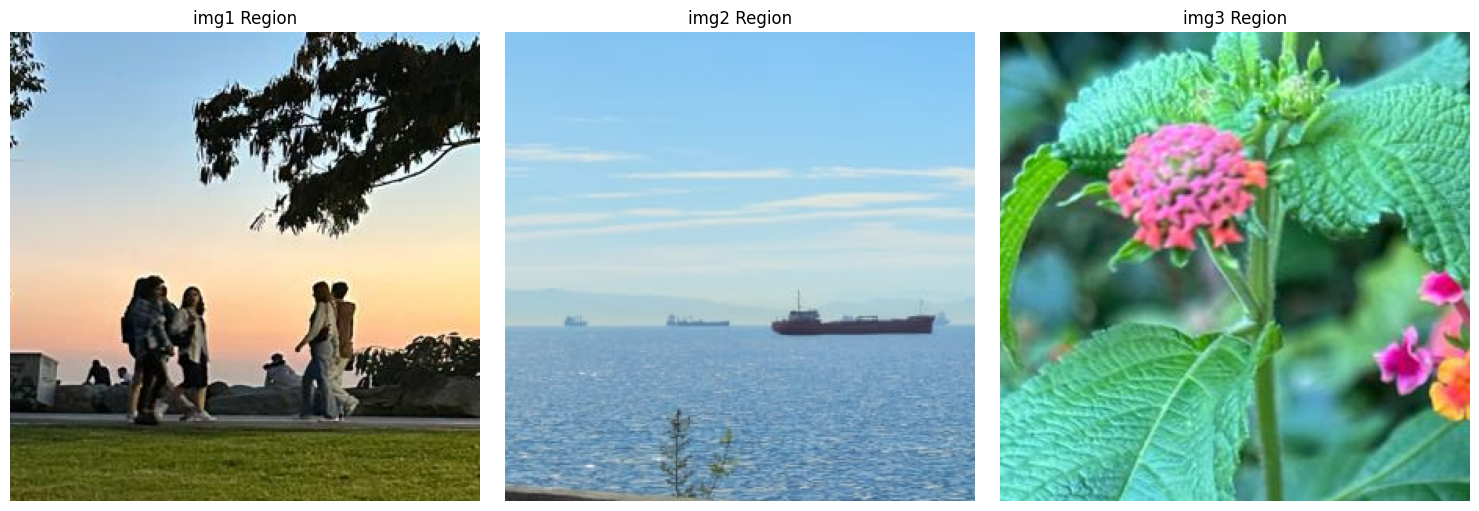

In [4]:
regions = {
    "img1": (500, 350, 800, 650),
    "img2": (250, 300, 550, 600),
    "img3": (200,200 ,500 , 500)
}

# Create subplots to display the extracted regions
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Extract and display the specified region from each image
for i, img_name in enumerate(["img1", "img2", "img3"]):
    img = locals()[img_name]  # Get the image variable by its name
    x_start, y_start, x_end, y_end = regions[img_name]
    region = img[y_start:y_end, x_start:x_end]  # Extract the region
    axs[i].imshow(region)
    axs[i].set_title(f"{img_name} Region")
    axs[i].axis("off")

# Display the subplots
plt.tight_layout()
plt.show()

EXPLANATION:
In this section, we extracted specific regions of interest from each image using array slicing.
The extracted regions are 300x300 pixel squares from different locations in each image.
This allows us to focus on particular details within the images and perform more detailed analysis
on these smaller regions. The regions were selected to highlight interesting features or textures
in each image.

#3C: Split each image region into RGB channels and display


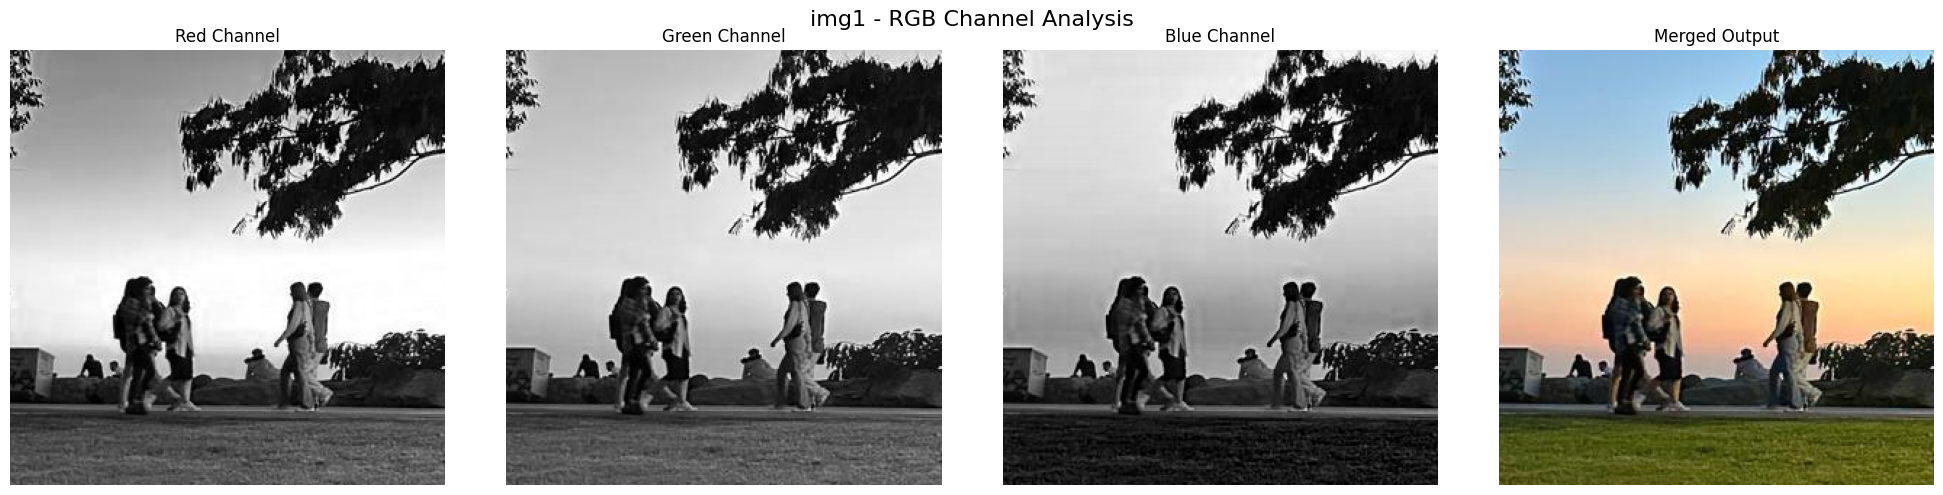

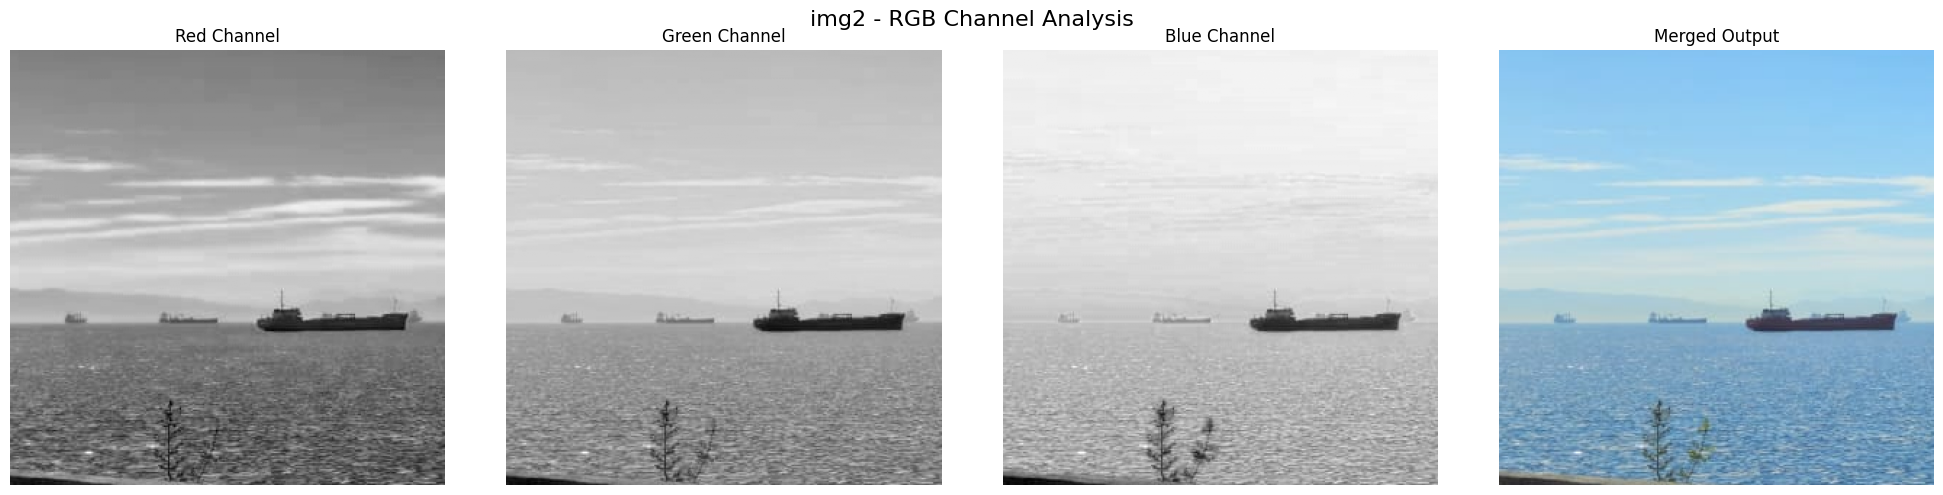

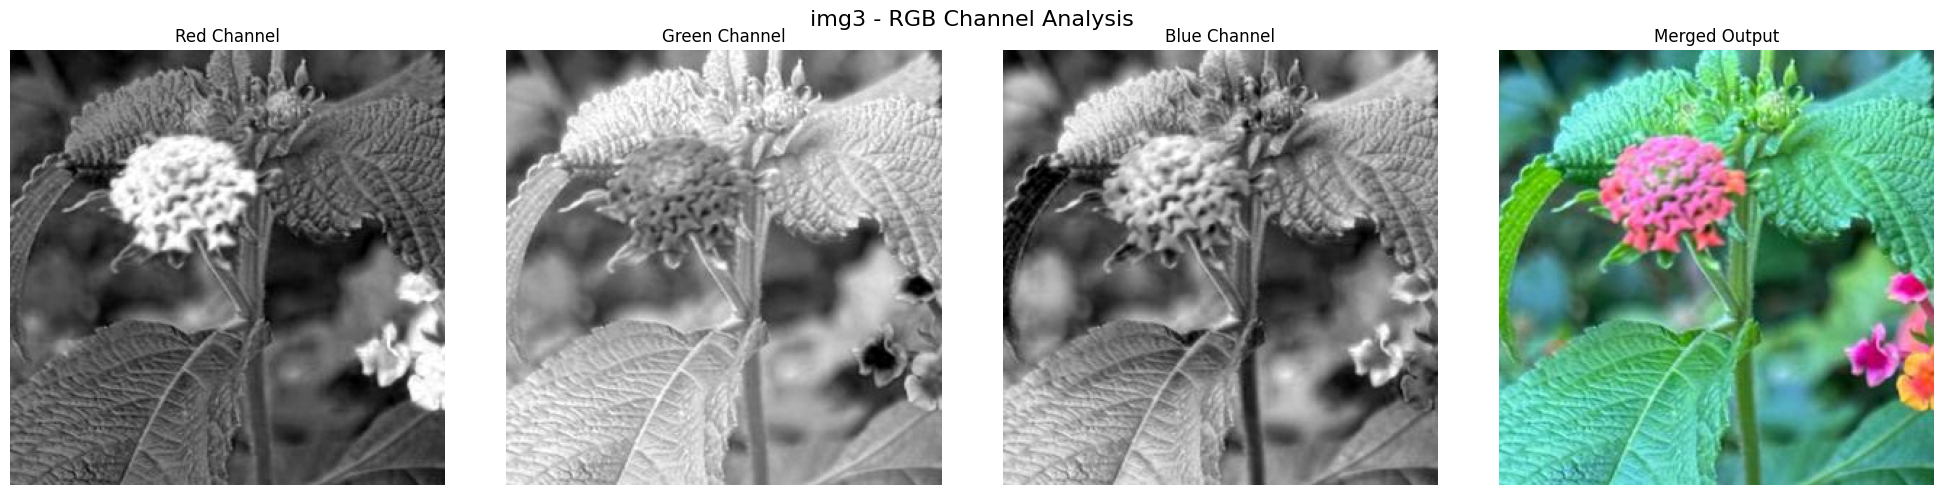

In [5]:
#Dictionary to store pixel values of all channels for later analysis
channel_pixel_values = {}

# Process each image one by one
for i, img_name in enumerate(["img1", "img2", "img3"]):
    img = locals()[img_name]  # Get the image variable by its name
    x_start, y_start, x_end, y_end = regions[img_name]
    region = img[y_start:y_end, x_start:x_end]  # Extract the region

    # Create a new figure for color channels
    plt.figure(figsize=[20, 5])
    plt.suptitle(f"{img_name} - RGB Channel Analysis", fontsize=16)

    # Split the image into individual RGB channels
    if len(region.shape) == 3:
        r = region[:,:,0]  # First channel is Red in RGB
        g = region[:,:,1]  # Second channel is Green
        b = region[:,:,2]  # Third channel is Blue
    else:
        r = g = b = region  # Handle grayscale images

    # Store channel pixel values in our dictionary for later use
    channel_pixel_values[img_name] = {
        'red': r,
        'green': g,
        'blue': b
    }

    # Display each channel separately in grayscale
    plt.subplot(141); plt.imshow(r, cmap="gray"); plt.title("Red Channel"); plt.axis("off")
    plt.subplot(142); plt.imshow(g, cmap="gray"); plt.title("Green Channel"); plt.axis("off")
    plt.subplot(143); plt.imshow(b, cmap="gray"); plt.title("Blue Channel"); plt.axis("off")

    # Merge the channels back to create the original colored region
    imgMerged = cv2.merge((r, g, b))

    # Display the merged result
    plt.subplot(144)
    plt.imshow(imgMerged)
    plt.title("Merged Output")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

EXPLANATION:
This section performs RGB channel separation for each extracted region.
For each image region, we split it into its Red, Green, and Blue components and displayed
each channel separately in grayscale. This allows us to analyze how each color channel
contributes to the overall image.

The brighter areas in each channel indicate higher intensity values for that particular color.
By examining each channel individually, we can identify which colors are dominant in different
parts of the image. The merged output confirms that our channel separation and recombination
process works correctly, as it matches the original extracted region

#3D: Print pixel values for the first image


In [6]:
# Display only the pixel values for the first image
img_name = "img1"  # Process only img1
print(f"\n{img_name} Channel Pixel Values:")

# Print Red channel pixel values
r_pixels = channel_pixel_values[img_name]['red']
print(f"\nRed Channel:")
print(r_pixels)

# Print Green channel pixel values
g_pixels = channel_pixel_values[img_name]['green']
print(f"\nGreen Channel:")
print(g_pixels)

# Print Blue channel pixel values
b_pixels = channel_pixel_values[img_name]['blue']
print(f"\nBlue Channel:")
print(b_pixels)


img1 Channel Pixel Values:

Red Channel:
[[ 26  58   6 ... 153 137 118]
 [ 57  11   0 ... 173 165 148]
 [ 44  39   0 ... 173 160 176]
 ...
 [ 97  74  64 ...  96 106 101]
 [104  93  76 ...  85  94  94]
 [ 95  95  96 ... 100  94 101]]

Green Channel:
[[ 32  64  12 ... 205 189 171]
 [ 67  23   9 ... 222 214 198]
 [ 63  59   5 ... 218 206 220]
 ...
 [ 98  75  65 ...  98 108 103]
 [103  92  75 ...  89  97  98]
 [ 94  94  95 ... 103  97 104]]

Blue Channel:
[[ 28  60  10 ... 242 226 205]
 [ 68  23  11 ... 254 244 225]
 [ 70  68  16 ... 239 222 233]
 ...
 [ 40  17   7 ...  23  35  28]
 [ 46  35  18 ...  15  26  24]
 [ 37  37  38 ...  32  26  33]]


EXPLANATION:
In this section, we displayed the actual numerical pixel values for each color channel
of the region extracted from the first image. These values represent the intensity of
each color (Red, Green, Blue) at each pixel position, ranging from 0 to 255.

By examining these values, we can see the precise color composition of the region.
Higher values indicate stronger color intensity, while lower values indicate less
intensity of that particular color. This numerical representation helps us understand
the image data at the most fundamental level and can be used for further quantitative analysis.

#3E: Display the images using different color maps without for loops

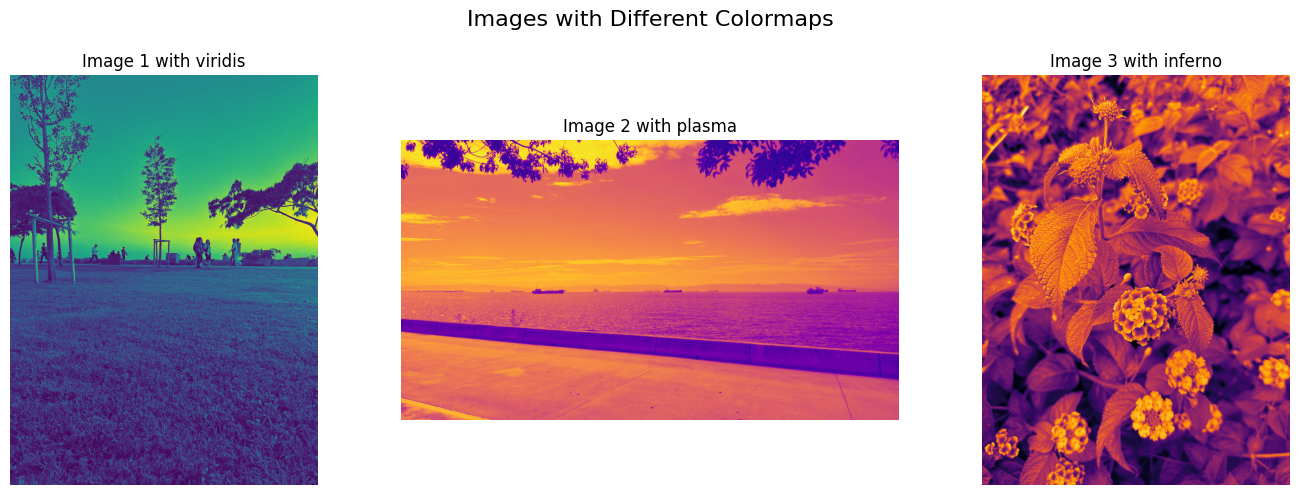

In [7]:
# Create a single figure for all images with different colormaps
plt.figure(figsize=(15, 5))
plt.suptitle("Images with Different Colormaps", fontsize=16)

# Convert first image to grayscale for colormap application
if len(img1.shape) == 3:
    gray_img1 = cv2.cvtColor(img1.astype(np.uint8), cv2.COLOR_RGB2GRAY)
else:
    gray_img1 = img1

# Convert second image to grayscale for colormap application
if len(img2.shape) == 3:
    gray_img2 = cv2.cvtColor(img2.astype(np.uint8), cv2.COLOR_RGB2GRAY)
else:
    gray_img2 = img2

# Convert third image to grayscale for colormap application
if len(img3.shape) == 3:
    gray_img3 = cv2.cvtColor(img3.astype(np.uint8), cv2.COLOR_RGB2GRAY)
else:
    gray_img3 = img3

# Display the first image with viridis colormap
plt.subplot(1, 3, 1)
plt.imshow(gray_img1, cmap='viridis')
plt.title("Image 1 with viridis")
plt.axis("off")

# Display the second image with plasma colormap
plt.subplot(1, 3, 2)
plt.imshow(gray_img2, cmap='plasma')
plt.title("Image 2 with plasma")
plt.axis("off")

# Display the third image with inferno colormap
plt.subplot(1, 3, 3)
plt.imshow(gray_img3, cmap='inferno')
plt.title("Image 3 with inferno")
plt.axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust space for the super title
plt.show()

EXPLANATION:
In this section, we applied different colormaps to the grayscale versions of our images.
First, we converted each color image to grayscale, then applied three different colormaps:
- viridis: A perceptually uniform colormap ranging from blue to green to yellow
- plasma: A colormap ranging from dark purple to orange to yellow
- inferno: A colormap ranging from black to red to yellow

Applying different colormaps can help visualize different features in the images and
enhance our perception of intensity variations that might not be apparent in the original
grayscale image. These false-color representations can be particularly useful for scientific
visualization and highlighting subtle details in the images.

#4: Load and display a new set of images

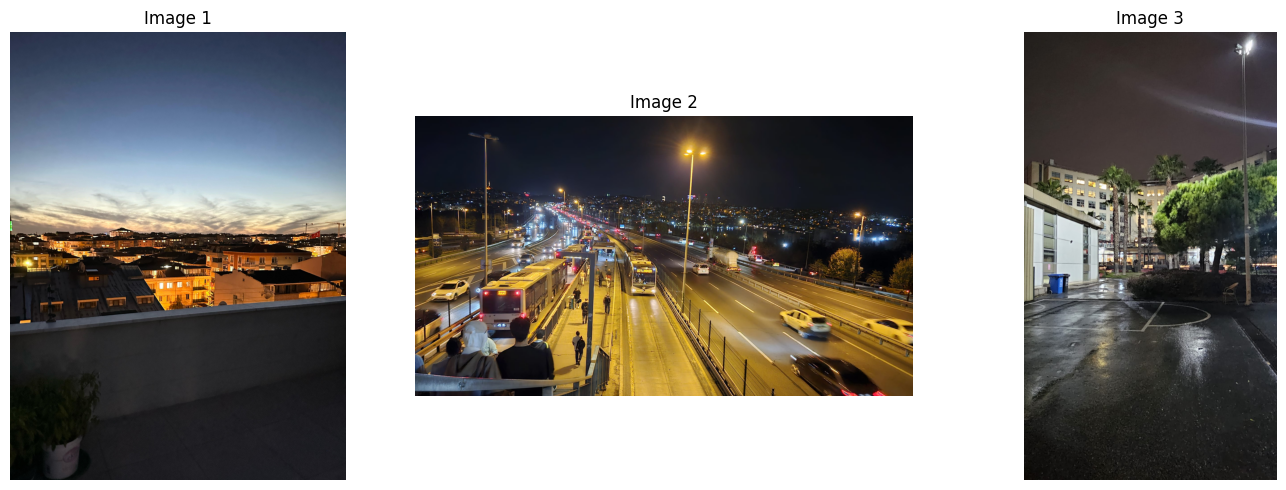

In [8]:
# Load three new images for analysis
img1 = plt.imread("Group7_image2a.jpg")
img2 = plt.imread("Group7_image2b.jpg")
img3 = plt.imread("Group7_image2c.jpg")

# Create subplots to display all three images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Display each image with title
axs[0].imshow(img1)
axs[0].set_title("Image 1")
axs[0].axis("off")
axs[1].imshow(img2)
axs[1].set_title("Image 2")
axs[1].axis("off")
axs[2].imshow(img3)
axs[2].set_title("Image 3")
axs[2].axis("off")

# Show the subplots
plt.tight_layout()
plt.show()

EXPLANATION:
For Question 4, we loaded a new set of three images and displayed them side by side.
This allows us to visually compare them before performing further analysis.
These images will be used for histogram analysis in the following sections to understand
their intensity distributions and identify potential enhancement opportunities.

#4A: Calculate and display histograms for all three images

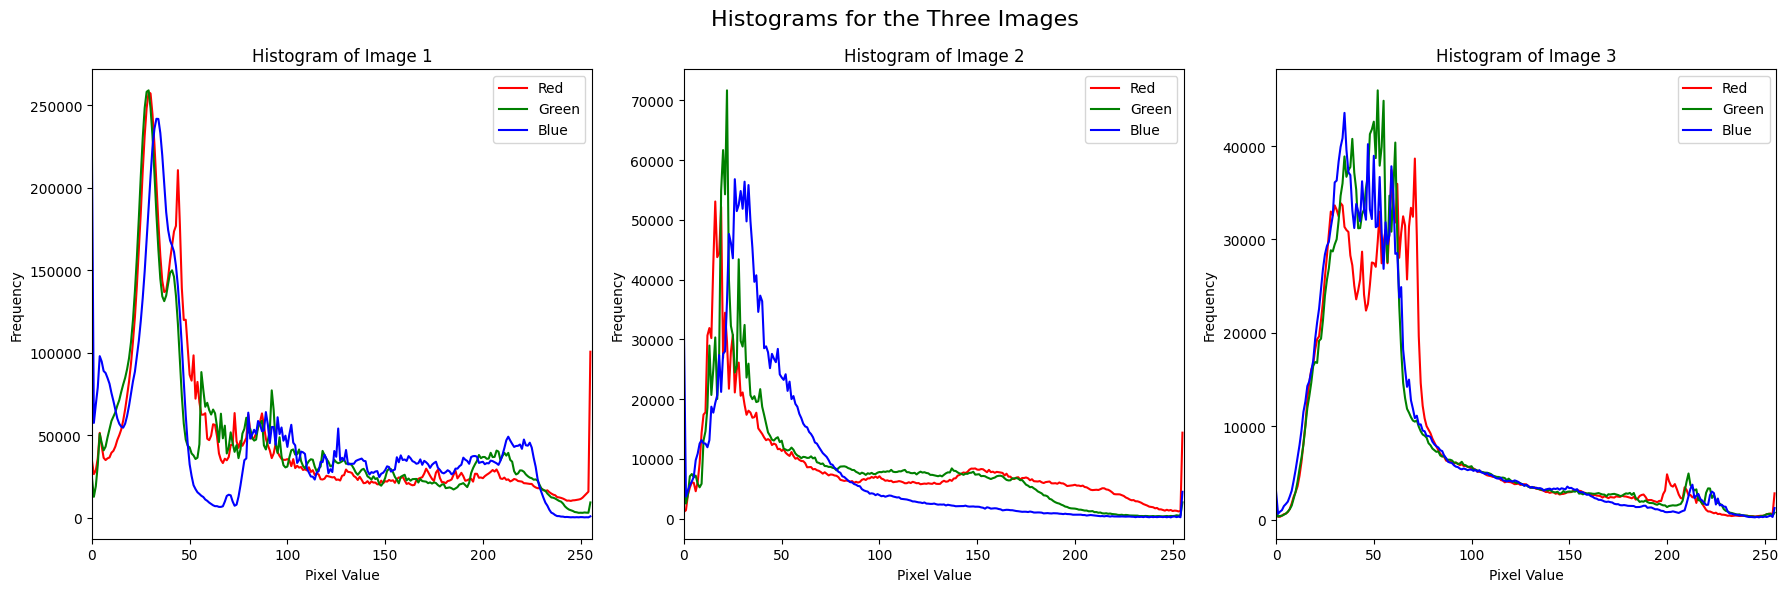

In [9]:
plt.figure(figsize=(18, 6))
plt.suptitle("Histograms for the Three Images", fontsize=16)

# Define a function to calculate and plot histogram for each color channel
def plot_histogram(ax, image, title):
    # Check if the image is grayscale or color
    if len(image.shape) == 3:  # Color image
        # Create separate histograms for RGB channels
        colors = ('r', 'g', 'b')
        channel_names = ('Red', 'Green', 'Blue')

        for i, color in enumerate(colors):
            # Calculate histogram for this channel
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            ax.plot(hist, color=color, label=channel_names[i])
    else:  # Grayscale image
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        ax.plot(hist, color='black', label='Grayscale')

    # Set chart properties
    ax.set_xlim([0, 256])
    ax.set_title(title)
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Frequency')
    ax.legend()

# Create subplots for each histogram
ax1 = plt.subplot(1, 3, 1)
plot_histogram(ax1, img1.astype(np.uint8), "Histogram of Image 1")

ax2 = plt.subplot(1, 3, 2)
plot_histogram(ax2, img2.astype(np.uint8), "Histogram of Image 2")

ax3 = plt.subplot(1, 3, 3)
plot_histogram(ax3, img3.astype(np.uint8), "Histogram of Image 3")

# Show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust for the super title
plt.show()

EXPLANATION:
In this section, we calculated and plotted the histograms for each of the three images.
A histogram shows the distribution of pixel intensities (0-255) for each color channel.

The x-axis represents the pixel values (0-255), and the y-axis shows how many pixels
have that particular value. This visualization helps us understand:
- The overall brightness/darkness of the image
- The contrast level (spread of the histogram)
- Color balance issues (differences between RGB channels)
- Potential clipping or detail loss in shadows or highlights

By analyzing these histograms, we can identify potential image quality issues and
determine appropriate enhancement techniques to apply.

#4B: Histogram interpretation and enhancement suggestions

Histogram Interpretation and Enhancement Suggestions:

Image 1 Histogram:
- Pixel distribution concentrated in mid-range values
- Limited contrast (not using full 0-255 range)
- Enhancement: Histogram equalization or contrast stretching

Image 2 Histogram:
- Concentrated in lower values (darker tones)
- Missing values present, possible detail loss
- Enhancement: Brightness increase and gamma correction

Image 3 Histogram:
- Wider distribution but not using full dynamic range
- Enhancement: Slight contrast enhancement

General Enhancement Techniques:
- Histogram Equalization: Enhances contrast by redistributing intensity values
- Contrast Stretching: Spreads pixel values across full range (0-255)
- Gamma Correction: Adjusts midtones while preserving highlights and shadows
- CLAHE: Performs regional contrast enhancement to avoid over-amplification of noise
- Color Balance Adjustment: Corrects balance between color channels

By applying these techniques, it's possible to significantly improve the quality of each image.